<a href="https://colab.research.google.com/github/naidu199/BrainTumar_Survival_Time_Analysis/blob/master/BrainTumar_Survival_Time_DataSet_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df =pd.read_csv("/content/drive/MyDrive/BrainTumarData/BrainTumor.csv")


In [3]:
df.head()

,Patient ID,Age,Gender,Tumor Type,Tumor Grade,Tumor Location,Treatment,Treatment Outcome,Time to Recurrence (months),Recurrence Site,Survival Time (months)
0,1,45,Male,Glioblastoma,IV,Frontal lobe,Surgery,Partial response,10.0,Temporal lobe,18
1,2,55,Female,Meningioma,I,Parietal lobe,Surgery,Complete response,NaN,NaN,36
2,3,60,Male,Astrocytoma,III,Occipital lobe,Surgery + Chemotherapy,Progressive disease,14.0,Frontal lobe,22
3,4,50,Female,Glioblastoma,IV,Temporal lobe,Surgery + Radiation therapy,Complete response,NaN,NaN,12
4,5,65,Male,Astrocytoma,II,Frontal lobe,Surgery + Radiation therapy,Partial response,24.0,Frontal lobe,48


To calculate the survival rate of a person suffering from a brain tumor, it is essential to understand each label in the dataset and determine which ones are crucial for the analysis. Here’s a detailed explanation of each label:

**Patient ID:**

Description:  A unique identifier for each patient.

Required: No, for statistical analysis, the Patient ID is not required as it does not provide any information about the patient's condition or treatment.

**Age:**

Description: The age of the patient.

Required: Yes, age is an important factor as it can influence the prognosis and survival rates.

**Gender:**

Description: The gender of the patient.

Required: Yes, gender can sometimes play a role in survival rates and response to treatment.

**Tumor Type:**

Description: The specific type of brain tumor the patient has.

Required: Yes, different tumor types can have different prognoses and survival rates.

**Tumor Grade:**

Description: The grade of the tumor, which indicates how aggressive it is.

Required: Yes, tumor grade is crucial as higher-grade tumors generally have worse prognoses.

**Tumor Location:**

Description: The location of the tumor in the brain.

Required: Yes, the location can affect the outcome and potential complications of the treatment.

**Treatment:**

Description: The type of treatment the patient received.

Required: Yes, treatment type can significantly influence survival rates.

**Treatment Outcome:**

Description: The result of the treatment (e.g., complete remission, partial remission, stable disease, progression).

Required: Yes, this provides direct information on how the treatment affected the patient's prognosis.

**Time to Recurrence (months):**

Description: The time from the end of treatment until the tumor recurred.

Required: Yes, this is important for understanding the effectiveness of treatment and long-term prognosis.

**Recurrence Site:**

Description: The location where the tumor recurred.

Required: Yes, this can influence further treatment decisions and survival rates.

**Survival Time (months):**

Description: The total time the patient survived from diagnosis or treatment start until death.

Required: Yes, this is the primary outcome variable for calculating survival rates.

**Not Required Labels**
Patient ID: It is not needed for survival rate calculations because it is simply a unique identifier and does not provide any clinical or prognostic information.

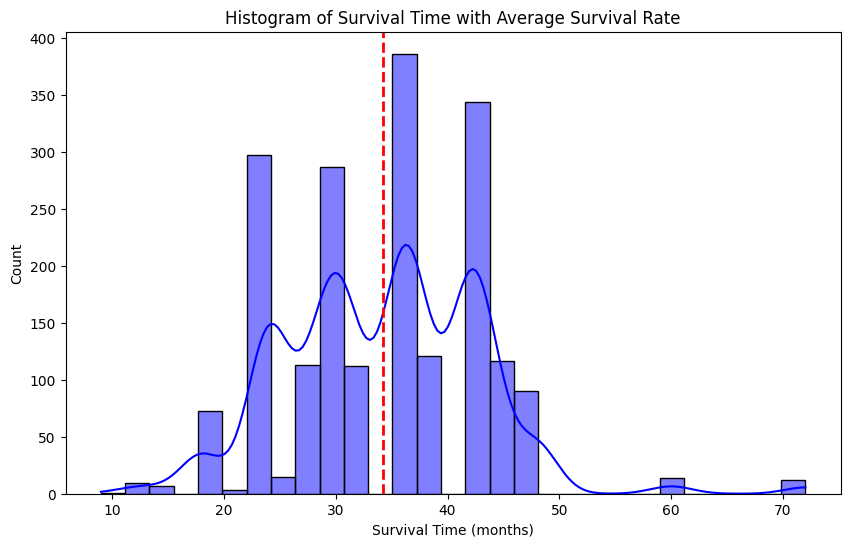

In [10]:

# Visualize the count per survival rate

plt.figure(figsize=(10, 6))
sns.histplot(df['Survival Time (months)'], kde=True, color='blue')
plt.axvline(df['Survival Time (months)'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.title('Histogram of Survival Time with Average Survival Rate')
plt.xlabel('Survival Time (months)')
plt.ylabel('Count')
plt.show()
# A vertical line indicates the average survival time, providing a reference point for the distribution.

# kde stands for Kernel Density Estimate. Setting kde=True adds a KDE plot on top of the histogram. A KDE plot is a smooth curve
# that represents the probability density function of the variable. It helps to understand the distribution shape of the data more clearly.

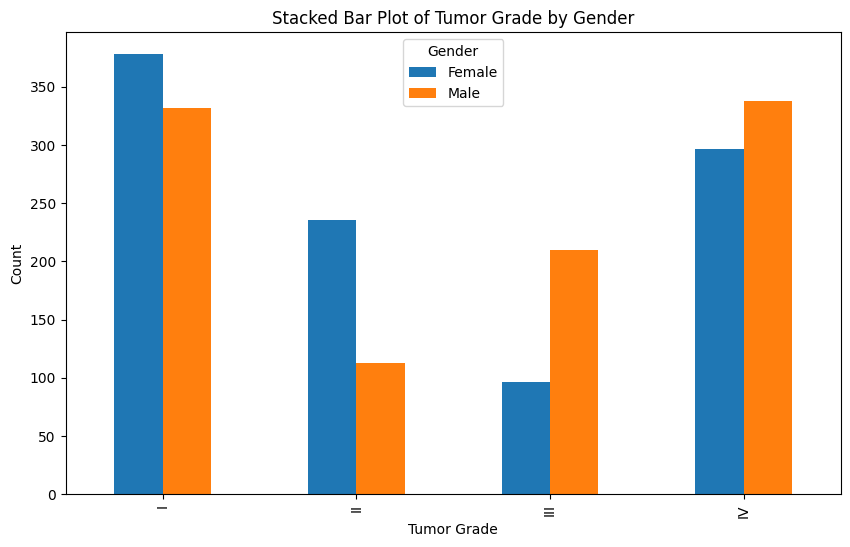

In [13]:
count_data = df.groupby(['Tumor Grade', 'Gender']).size().unstack().fillna(0)

# Plot
count_data.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Stacked Bar Plot of Tumor Grade by Gender')
plt.xlabel('Tumor Grade')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

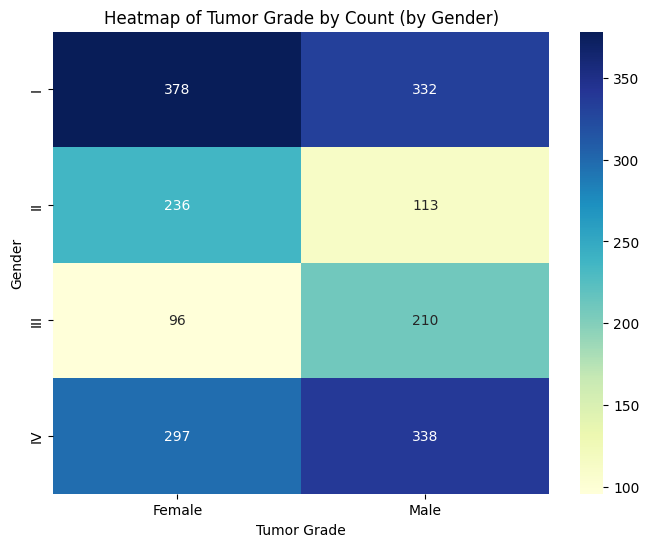

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 6))  # Create a figure with desired size

# Create the heatmap using the existing figure and axis
sns.heatmap(count_data, cmap='YlGnBu', annot=True, fmt='.0f', ax=ax)

plt.title('Heatmap of Tumor Grade by Count (by Gender)')
plt.xlabel('Tumor Grade')
plt.ylabel('Gender')
plt.show()


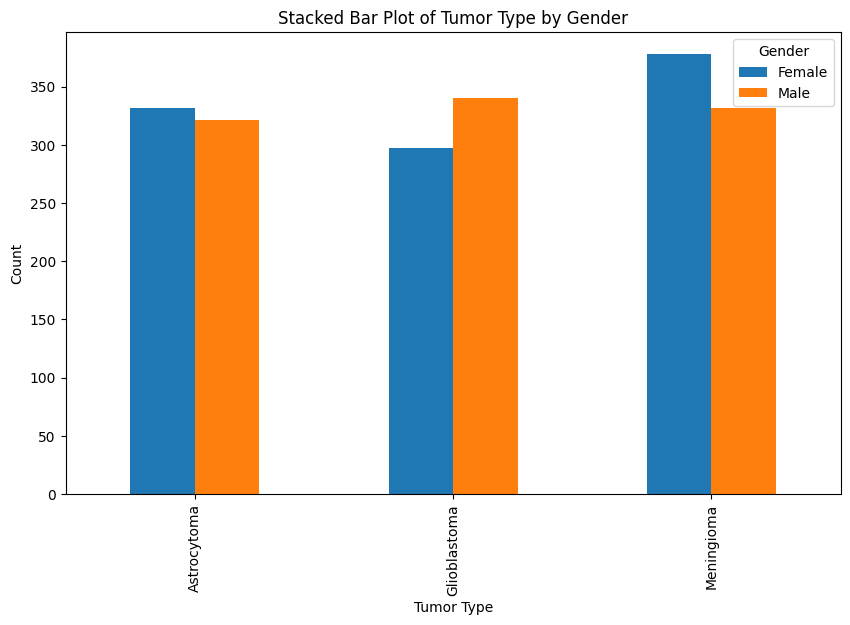

In [28]:
count_data = df.groupby(['Tumor Type', 'Gender']).size().unstack().fillna(0)

# Plot
count_data.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Stacked Bar Plot of Tumor Type by Gender')
plt.xlabel('Tumor Type',loc='center')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

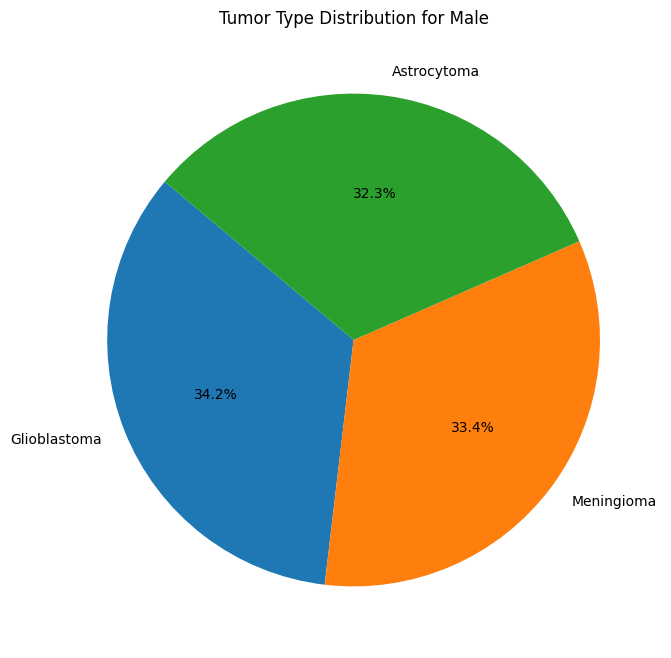

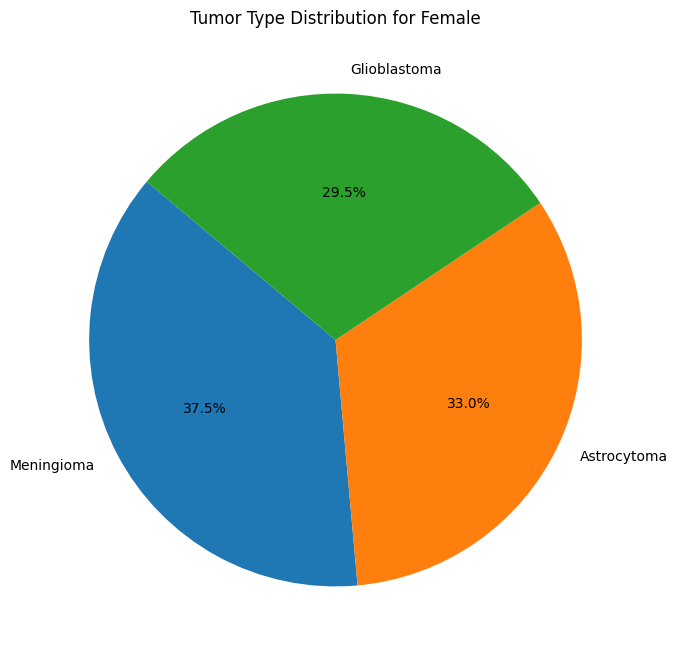

In [30]:
# Plot pie charts for each gender
for gender in df['Gender'].unique():
    plt.figure(figsize=(8, 8))
    gender_data = df[df['Gender'] == gender]['Tumor Type'].value_counts()
    plt.pie(gender_data, labels=gender_data.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Tumor Type Distribution for {gender}')
    plt.show()

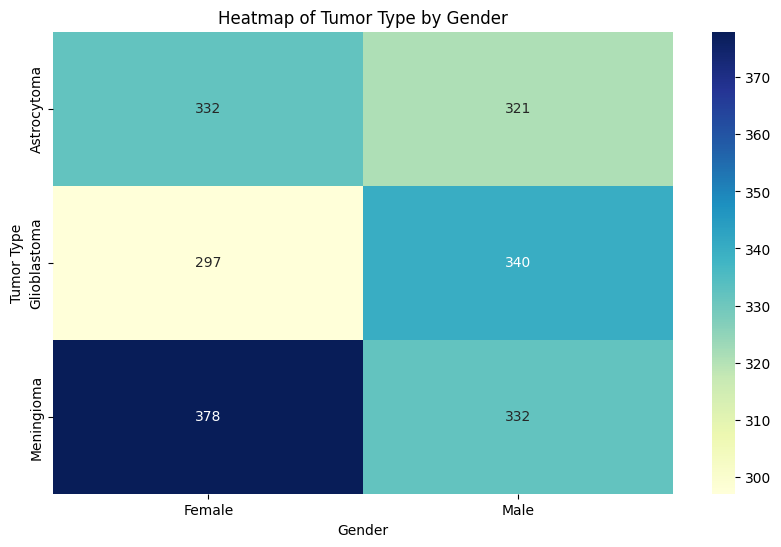

In [31]:


# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(count_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Tumor Type by Gender')
plt.xlabel('Gender')
plt.ylabel('Tumor Type')
plt.show()
